In [1]:
import random

# Generar nodos n1 a n40
nodes = [f"n{i}" for i in range(1, 41)]

# Crear lista de arcos: solo permitimos de menor a mayor índice
arcs = set()
min_connections = 3

# Aseguramos al menos 3 conexiones por nodo (excepto n1 y n40)
for i in range(1, 39):  # de n2 a n39
    from_node = f"n{i}"
    connections = set()
    while len(connections) < min_connections:
        to_index = random.randint(i + 1, min(i + 6, 40))  # limitar salto para evitar conexiones demasiado lejanas
        to_node = f"n{to_index}"
        connections.add((from_node, to_node))
    arcs.update(connections)

# Aseguramos conexiones mínimas para n1
while sum(1 for arc in arcs if arc[0] == "n1") < min_connections:
    to_index = random.randint(2, 6)
    arcs.add(("n1", f"n{to_index}"))

# Aseguramos conexiones hacia n40
while sum(1 for arc in arcs if arc[1] == "n40") < min_connections:
    from_index = random.randint(35, 39)
    arcs.add((f"n{from_index}", "n40"))

# Eliminar duplicados y ordenar
arcs = sorted(arcs, key=lambda x: (int(x[0][1:]), int(x[1][1:])))

# Generar valores de distancia, tiempo y recurso
def random_values():
    return {
        "dist": round(random.uniform(1.0, 20.0), 1),
        "time": round(random.uniform(1.0, 20.0), 1),
        "resource": round(random.uniform(1.0, 10.0), 1)
    }

arc_values = {arc: random_values() for arc in arcs}

# Crear texto del archivo .dat
dat_content = "set NODES :=\n" + " ".join(nodes) + ";\n\n"

dat_content += "set ARCS :=\n" + "\n".join(f"    ({i},{j})" for i, j in arcs) + ";\n\n"
dat_content += "param source := n1;\nparam sink := n40;\n\n"

# Parámetros
for param in ["dist", "time", "resource"]:
    dat_content += f"param {param} :=\n    [*,*]\n"
    for arc in arcs:
        val = arc_values[arc][param]
        dat_content += f"    {arc[0]} {arc[1]} {val}\n"
    dat_content += ";\n\n"

# Guardar archivo
file_path = "rcspp_40_nodos_ordenado.dat"
with open(file_path, "w") as f:
    f.write(dat_content)

file_path


KeyboardInterrupt: 

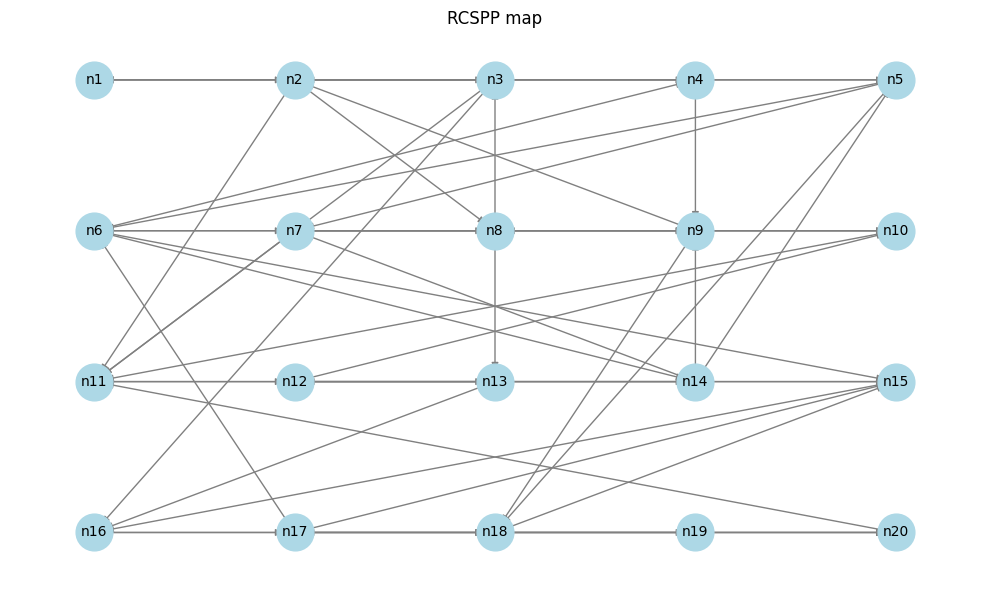

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Leer los arcos como antes
def leer_arcos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        lineas = f.readlines()
    arcos = []
    for linea in lineas:
        if '(' in linea:
            partes = linea.strip().replace('(', '').replace(')', '').split()
            for p in partes:
                try:
                    i, j = p.split(',')
                    i = i.strip()
                    j = j.strip()
                    # Ensure both nodes are valid
                    if i.isalnum() and j.isalnum():
                        arcos.append((i, j))
                except ValueError:
                    # Skip invalid entries
                    continue
    return arcos

# Lista de nodos en orden
def extraer_nodos(arcos):
    nodos = set()
    for i, j in arcos:
        nodos.add(i)
        nodos.add(j)
    return sorted(nodos, key=lambda x: int(x[1:]))  # Asume formato 'n1', 'n2', ...

# Posiciones en cuadrícula
def posiciones_en_cuadricula(nodos, columnas=5):
    pos = {}
    for idx, nodo in enumerate(nodos):
        fila = idx // columnas
        col = idx % columnas
        pos[nodo] = (col, -fila)  # invertimos fila para que vaya de arriba hacia abajo
    return pos

# Cargar datos
arcos = leer_arcos("grafo_20_v2.txt")
nodos = extraer_nodos(arcos)
pos = posiciones_en_cuadricula(nodos, columnas=5)

# Crear y dibujar el grafo
G = nx.DiGraph()
G.add_edges_from(arcos)

plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("RCSPP map")
plt.axis('off')
plt.tight_layout()
plt.show()


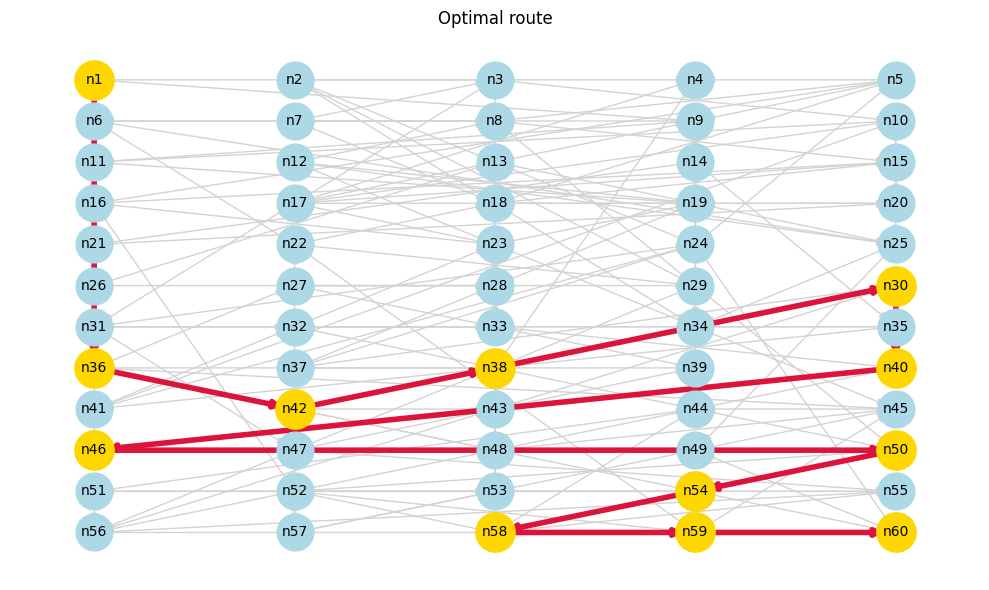

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import re

# ---------- FUNCIONES ----------

# Lee arcos desde archivos como el de AMPL
def leer_arcos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        contenido = f.read()
    matches = re.findall(r'\((n\d+),\s*(n\d+)\)', contenido)
    arcos = [(i, j) for i, j in matches]
    return arcos

# Extrae nodos en orden a partir de la lista de arcos
def extraer_nodos(arcos):
    nodos = set()
    for i, j in arcos:
        nodos.add(i)
        nodos.add(j)
    return sorted(nodos, key=lambda x: int(x[1:]))

# Asigna posiciones tipo cuadrícula
def posiciones_en_cuadricula(nodos, columnas=5):
    pos = {}
    for idx, nodo in enumerate(nodos):
        fila = idx // columnas
        col = idx % columnas
        pos[nodo] = (col, -fila)  # invertimos fila para que sea de arriba hacia abajo
    return pos

# ---------- CARGA Y VISUALIZACIÓN ----------

# Archivos
archivo_arcos = "grafo_60.txt"
archivo_ruta = "test.txt"

# Leer datos
arcos = leer_arcos(archivo_arcos)
ruta = leer_arcos(archivo_ruta)
nodos = extraer_nodos(arcos)
pos = posiciones_en_cuadricula(nodos, columnas=5)

# Crear grafo base
G = nx.DiGraph()
G.add_edges_from(arcos)

# Nodos que están en la ruta óptima
nodos_ruta = set(n for arco in ruta for n in arco)

# ---------- DIBUJAR ----------

plt.figure(figsize=(10, 6))

# Dibujar nodos: ruta óptima en dorado, otros en celeste
nx.draw_networkx_nodes(G, pos, nodelist=nodos_ruta, node_color='gold', node_size=800)
nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if n not in nodos_ruta], node_color='lightblue', node_size=700)

# Arcos base en gris
nx.draw_networkx_edges(G, pos, edgelist=arcos, edge_color='lightgray', width=1)

# Ruta óptima en rojo fuerte
nx.draw_networkx_edges(G, pos, edgelist=ruta, edge_color='crimson', width=4, arrows=True)

# Etiquetas de nodos
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("Optimal route")
plt.axis('off')
plt.tight_layout()
plt.show()


In [3]:
!pip install scikit-learn

c:\Users\nicos\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


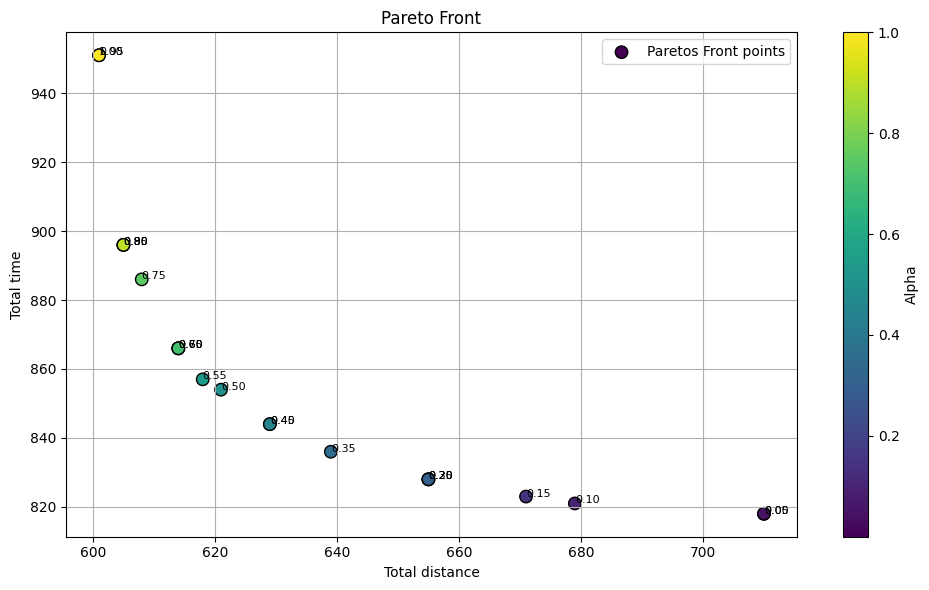

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.linear_model import LinearRegression

# Función para leer las métricas desde el archivo de log
def leer_metricas_log(archivo_log):
    alphas, distancias, tiempos, recursos = [], [], [], []
    try:
        with open(archivo_log, 'r') as f:
            for idx, linea in enumerate(f):
                if idx == 0:
                    # Saltar la línea de encabezado
                    continue
                if linea.strip():
                    partes = linea.strip().split(',')
                    alpha = float(partes[0])  # Extraemos alpha
                    distancia = float(partes[1])  # Extraemos distancia
                    tiempo = float(partes[2])  # Extraemos tiempo
                    recurso = float(partes[3])  # Extraemos recurso
                    alphas.append(alpha)
                    distancias.append(distancia)
                    tiempos.append(tiempo)
                    recursos.append(recurso)
    except Exception as e:
        print(f"Error leyendo el archivo de log: {e}")
    return alphas, distancias, tiempos, recursos

# Función para graficar el frente de Pareto con interpolación y regresión
def graficar_frente_con_regresion(alphas, distancias, tiempos):
    if not alphas:
        print("No se encontraron métricas para el frente de Pareto.")
        return

    # Convertir listas a arrays de numpy para la regresión
    X = np.array(distancias).reshape(-1, 1)
    y = np.array(tiempos)

    # Regresión lineal
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)

    # Interpolación
    interpolador = interpolate.interp1d(distancias, tiempos, kind='linear', fill_value="extrapolate")
    distancias_interp = np.linspace(min(distancias), max(distancias), 500)
    tiempos_interp = interpolador(distancias_interp)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Puntos originales del frente de Pareto
    plt.scatter(distancias, tiempos, c=alphas, cmap='viridis', s=80, label='Paretos Front points', edgecolor='k')
    for i in range(len(alphas)):
        plt.text(distancias[i], tiempos[i], f'{alphas[i]:.2f}', fontsize=8)


    # Etiquetas y título
    plt.xlabel('Total distance')
    plt.ylabel('Total time')
    plt.title('Pareto Front')
    plt.colorbar(label='Alpha')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === MAIN ===
archivo_log = './dat7/log_file'  # Asegúrate de que este sea el nombre correcto de tu archivo

# Leer métricas desde el archivo de log
alphas, distancias, tiempos, recursos = leer_metricas_log(archivo_log)

# Graficar el frente de Pareto con regresión lineal e interpolación
graficar_frente_con_regresion(alphas, distancias, tiempos)


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import os

# ---------- FUNCIONES ----------

def leer_arcos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        contenido = f.read()
    matches = re.findall(r'\((n\d+),\s*(n\d+)\)', contenido)
    arcos = [(i, j) for i, j in matches]
    return arcos

def extraer_nodos(arcos):
    nodos = set()
    for i, j in arcos:
        nodos.add(i)
        nodos.add(j)
    return sorted(nodos, key=lambda x: int(x[1:]))

def posiciones_en_cuadricula(nodos, columnas=5):
    pos = {}
    for idx, nodo in enumerate(nodos):
        fila = idx // columnas
        col = idx % columnas
        pos[nodo] = (col, -fila)
    return pos

def graficar_ruta(G, arcos, ruta, pos, alpha, nodos_ruta, output_dir="./dat3/rutas_alpha"):
    plt.figure(figsize=(10, 6))
    
    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, nodelist=nodos_ruta, node_color='gold', node_size=800)
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if n not in nodos_ruta], node_color='lightblue', node_size=700)
    
    # Arcos base
    nx.draw_networkx_edges(G, pos, edgelist=arcos, edge_color='lightgray', width=1)
    
    # Ruta óptima
    nx.draw_networkx_edges(G, pos, edgelist=ruta, edge_color='crimson', width=4, arrows=True)
    
    # Etiquetas
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.title(f"Ruta óptima para alpha = {alpha:.2f}")
    plt.axis('off')
    plt.tight_layout()
    
    # Crear directorio si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Guardar figura
    plt.savefig(f"{output_dir}/ruta_alpha_{alpha:.2f}.png")
    plt.close()

# ---------- CONFIGURACIÓN ----------

archivo_arcos = "arcs4.txt"
arcos = leer_arcos(archivo_arcos)
nodos = extraer_nodos(arcos)
pos = posiciones_en_cuadricula(nodos, columnas=5)
G = nx.DiGraph()
G.add_edges_from(arcos)

# ---------- PROCESAR TODAS LAS RUTAS ----------

valores_alpha = [round(x * 0.05, 2) for x in range(0, 21)]  # 0.00, 0.05, ..., 1.00

for alpha in valores_alpha:
    archivo_ruta = f"./dat3/ruta_alpha_{alpha:.2f}.txt"
    
    try:
        ruta = leer_arcos(archivo_ruta)
        nodos_ruta = set(n for arco in ruta for n in arco)
        graficar_ruta(G, arcos, ruta, pos, alpha, nodos_ruta)
        print(f"Procesado alpha = {alpha:.2f} correctamente")
    except FileNotFoundError:
        print(f"Advertencia: No se encontró el archivo {archivo_ruta}")
    except Exception as e:
        print(f"Error procesando alpha = {alpha:.2f}: {str(e)}")

print("Proceso completado. Todas las rutas han sido graficadas.")

Procesado alpha = 0.00 correctamente
Procesado alpha = 0.05 correctamente
Procesado alpha = 0.10 correctamente
Procesado alpha = 0.15 correctamente
Procesado alpha = 0.20 correctamente
Procesado alpha = 0.25 correctamente
Procesado alpha = 0.30 correctamente
Procesado alpha = 0.35 correctamente
Procesado alpha = 0.40 correctamente
Procesado alpha = 0.45 correctamente
Procesado alpha = 0.50 correctamente
Procesado alpha = 0.55 correctamente
Advertencia: No se encontró el archivo ./dat3/ruta_alpha_0.60.txt
Procesado alpha = 0.65 correctamente
Advertencia: No se encontró el archivo ./dat3/ruta_alpha_0.70.txt
Procesado alpha = 0.75 correctamente
Advertencia: No se encontró el archivo ./dat3/ruta_alpha_0.80.txt
Procesado alpha = 0.85 correctamente
Advertencia: No se encontró el archivo ./dat3/ruta_alpha_0.90.txt
Procesado alpha = 0.95 correctamente
Procesado alpha = 1.00 correctamente
Proceso completado. Todas las rutas han sido graficadas.


c:\Users\nicos\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


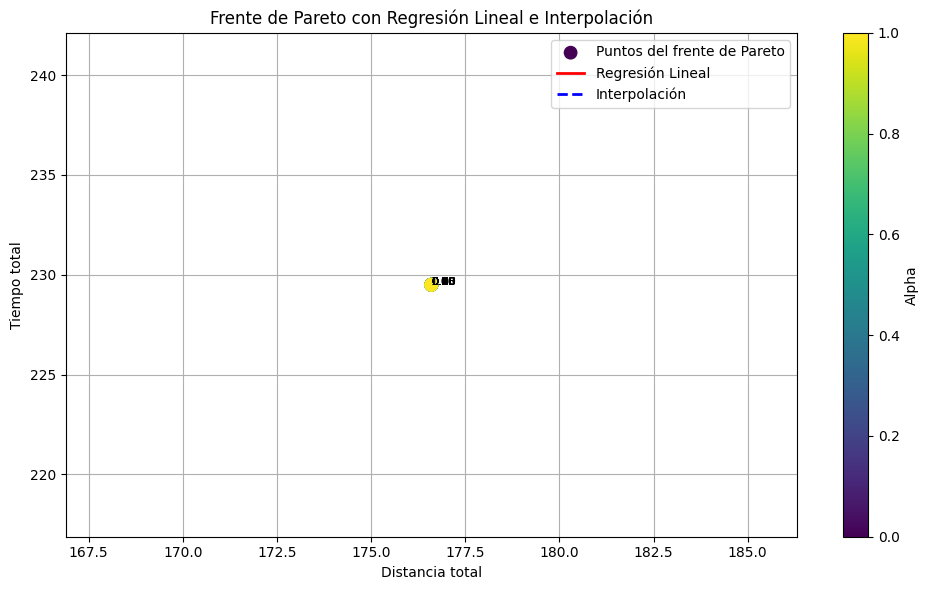

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.linear_model import LinearRegression

# Función para leer las métricas desde el archivo de log
def leer_metricas_log(archivo_log):
    alphas, distancias, tiempos, recursos = [], [], [], []
    try:
        with open(archivo_log, 'r') as f:
            for idx, linea in enumerate(f):
                if idx == 0:
                    # Saltar la línea de encabezado
                    continue
                if linea.strip():
                    partes = linea.strip().split(',')
                    alpha = float(partes[0])  # Extraemos alpha
                    distancia = float(partes[1])  # Extraemos distancia
                    tiempo = float(partes[2])  # Extraemos tiempo
                    recurso = float(partes[3])  # Extraemos recurso
                    alphas.append(alpha)
                    distancias.append(distancia)
                    tiempos.append(tiempo)
                    recursos.append(recurso)
    except Exception as e:
        print(f"Error leyendo el archivo de log: {e}")
    return alphas, distancias, tiempos, recursos

# Función para graficar el frente de Pareto con interpolación y regresión
def graficar_frente_con_regresion(alphas, distancias, tiempos):
    if not alphas:
        print("No se encontraron métricas para el frente de Pareto.")
        return

    # Convertir listas a arrays de numpy para la regresión
    X = np.array(distancias).reshape(-1, 1)
    y = np.array(tiempos)

    # Regresión lineal
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)

    # Interpolación
    interpolador = interpolate.interp1d(distancias, tiempos, kind='linear', fill_value="extrapolate")
    distancias_interp = np.linspace(min(distancias), max(distancias), 500)
    tiempos_interp = interpolador(distancias_interp)

    # Crear el gráfico
    plt.figure(figsize=(10, 6))

    # Puntos originales del frente de Pareto
    plt.scatter(distancias, tiempos, c=alphas, cmap='viridis', s=80, label='Puntos del frente de Pareto')
    for i in range(len(alphas)):
        plt.text(distancias[i], tiempos[i], f'{alphas[i]:.2f}', fontsize=8)

    # Línea de regresión lineal
    plt.plot(distancias, y_pred, color='red', label='Regresión Lineal', linewidth=2)

    # Interpolación
    plt.plot(distancias_interp, tiempos_interp, color='blue', linestyle='--', label='Interpolación', linewidth=2)

    # Etiquetas y título
    plt.xlabel('Distancia total')
    plt.ylabel('Tiempo total')
    plt.title('Frente de Pareto con Regresión Lineal e Interpolación')
    plt.colorbar(label='Alpha')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# === MAIN ===
archivo_log = './dat3/log_file_time'  # Asegúrate de que este sea el nombre correcto de tu archivo

# Leer métricas desde el archivo de log
alphas, distancias, tiempos, recursos = leer_metricas_log(archivo_log)

# Graficar el frente de Pareto con regresión lineal e interpolación
graficar_frente_con_regresion(alphas, distancias, tiempos)


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import re
import os

# ---------- FUNCIONES ----------

def leer_arcos(nombre_archivo):
    with open(nombre_archivo, 'r') as f:
        contenido = f.read()
    matches = re.findall(r'\((n\d+),\s*(n\d+)\)', contenido)
    arcos = [(i, j) for i, j in matches]
    return arcos

def extraer_nodos(arcos):
    nodos = set()
    for i, j in arcos:
        nodos.add(i)
        nodos.add(j)
    return sorted(nodos, key=lambda x: int(x[1:]))

def posiciones_en_cuadricula(nodos, columnas=5):
    pos = {}
    for idx, nodo in enumerate(nodos):
        fila = idx // columnas
        col = idx % columnas
        pos[nodo] = (col, -fila)
    return pos

def graficar_ruta(G, arcos, ruta, pos, alpha, nodos_ruta, output_dir="./dat2/rutas_alpha"):
    plt.figure(figsize=(10, 6))
    
    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, nodelist=nodos_ruta, node_color='gold', node_size=800)
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n in G.nodes if n not in nodos_ruta], node_color='lightblue', node_size=700)
    
    # Arcos base
    nx.draw_networkx_edges(G, pos, edgelist=arcos, edge_color='lightgray', width=1)
    
    # Ruta óptima
    nx.draw_networkx_edges(G, pos, edgelist=ruta, edge_color='crimson', width=4, arrows=True)
    
    # Etiquetas
    nx.draw_networkx_labels(G, pos, font_size=10)
    
    plt.title(f"Ruta óptima para alpha = {alpha:.2f}")
    plt.axis('off')
    plt.tight_layout()
    
    # Crear directorio si no existe
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Guardar figura
    plt.savefig(f"{output_dir}/ruta_alpha_{alpha:.2f}.png")
    plt.close()

# ---------- CONFIGURACIÓN ----------

archivo_arcos = "arcs4.txt"
arcos = leer_arcos(archivo_arcos)
nodos = extraer_nodos(arcos)
pos = posiciones_en_cuadricula(nodos, columnas=5)
G = nx.DiGraph()
G.add_edges_from(arcos)

# ---------- PROCESAR TODAS LAS RUTAS ----------

valores_alpha = [round(x * 0.05, 2) for x in range(0, 21)]  # 0.00, 0.05, ..., 1.00

for alpha in valores_alpha:
    archivo_ruta = f"./dat2/ruta_alpha_{alpha:.2f}.txt"
    
    try:
        ruta = leer_arcos(archivo_ruta)
        nodos_ruta = set(n for arco in ruta for n in arco)
        graficar_ruta(G, arcos, ruta, pos, alpha, nodos_ruta)
        print(f"Procesado alpha = {alpha:.2f} correctamente")
    except FileNotFoundError:
        print(f"Advertencia: No se encontró el archivo {archivo_ruta}")
    except Exception as e:
        print(f"Error procesando alpha = {alpha:.2f}: {str(e)}")

print("Proceso completado. Todas las rutas han sido graficadas.")

Procesado alpha = 0.00 correctamente
Procesado alpha = 0.05 correctamente
Procesado alpha = 0.10 correctamente
Procesado alpha = 0.15 correctamente
Procesado alpha = 0.20 correctamente
Procesado alpha = 0.25 correctamente
Procesado alpha = 0.30 correctamente
Procesado alpha = 0.35 correctamente
Procesado alpha = 0.40 correctamente
Procesado alpha = 0.45 correctamente
Procesado alpha = 0.50 correctamente
Procesado alpha = 0.55 correctamente
Procesado alpha = 0.60 correctamente
Procesado alpha = 0.65 correctamente
Procesado alpha = 0.70 correctamente
Procesado alpha = 0.75 correctamente
Procesado alpha = 0.80 correctamente
Procesado alpha = 0.85 correctamente
Procesado alpha = 0.90 correctamente
Procesado alpha = 0.95 correctamente
Procesado alpha = 1.00 correctamente
Proceso completado. Todas las rutas han sido graficadas.


In [5]:
import pandas as pd


df = pd.read_csv("./dat7/log_file ", skipinitialspace=True)

latex_table = df.to_latex(index=False, float_format="%.5f")
print(latex_table)


\begin{tabular}{rrrr}
\toprule
alpha & dist_total & time_total & resource_totalS \\
\midrule
0.00001 & 710 & 818 & 593 \\
0.05000 & 710 & 818 & 593 \\
0.10000 & 679 & 821 & 569 \\
0.15000 & 671 & 823 & 566 \\
0.20000 & 655 & 828 & 584 \\
0.25000 & 655 & 828 & 584 \\
0.30000 & 655 & 828 & 584 \\
0.35000 & 639 & 836 & 562 \\
0.40000 & 629 & 844 & 557 \\
0.45000 & 629 & 844 & 557 \\
0.50000 & 621 & 854 & 575 \\
0.55000 & 618 & 857 & 564 \\
0.60000 & 614 & 866 & 559 \\
0.65000 & 614 & 866 & 559 \\
0.70000 & 614 & 866 & 559 \\
0.75000 & 608 & 886 & 574 \\
0.80000 & 605 & 896 & 586 \\
0.85000 & 605 & 896 & 586 \\
0.90000 & 605 & 896 & 586 \\
0.95000 & 601 & 951 & 609 \\
1.00000 & 601 & 951 & 609 \\
\bottomrule
\end{tabular}



In [16]:
from tabulate import tabulate

print(tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False))


╒═════════╤══════════════╤══════════════╤══════════════════╕
│   alpha │   dist_total │   time_total │   resource_total │
╞═════════╪══════════════╪══════════════╪══════════════════╡
│    0    │           20 │           20 │               15 │
├─────────┼──────────────┼──────────────┼──────────────────┤
│    0.05 │           20 │           20 │               15 │
├─────────┼──────────────┼──────────────┼──────────────────┤
│    0.1  │           20 │           20 │               15 │
├─────────┼──────────────┼──────────────┼──────────────────┤
│    0.15 │           20 │           20 │               15 │
├─────────┼──────────────┼──────────────┼──────────────────┤
│    0.2  │           20 │           20 │               15 │
├─────────┼──────────────┼──────────────┼──────────────────┤
│    0.25 │           20 │           20 │               15 │
├─────────┼──────────────┼──────────────┼──────────────────┤
│    0.3  │           20 │           20 │               15 │
├─────────┼─────────────